In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv(r"D:\RAM\collegePlace.csv")

In [3]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [6]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df.sample()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
88,22,Female,Civil,1,6,1,0,0


In [8]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [9]:
df.Age.nunique()

11

In [10]:
df.Age.value_counts()

Age
21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: count, dtype: int64

In [11]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


Calculate the mean, median, and standard deviation of CGPA.
Determine the percentage of students who were placed.
Find the maximum number of internships done by any student.

In [12]:
Mean = df.CGPA.mean()
Median  = df.CGPA.median()
Mode = df.CGPA.mode()
Std = df.CGPA.std()
print(f"{Mean}\n{Median}\n{Mode}\n{Std}")

7.073836817262306
7.0
0    7
Name: CGPA, dtype: int64
0.9677479876645856


In [13]:
print(f"{"Mean :",Mean}\n{"Median:",Median}\n{"Mode:",Mode}\n{"Std:",Std}")

('Mean :', 7.073836817262306)
('Median:', 7.0)
('Mode:', 0    7
Name: CGPA, dtype: int64)
('Std:', 0.9677479876645856)


In [14]:
Place_count =df.PlacedOrNot.count()
Place_sum = df.PlacedOrNot.sum()
percentage_place = (Place_count/Place_sum)*100
print(f"Total Percentage of the Students Placed in College :  {percentage_place:.2f}%")


Total Percentage of the Students Placed in College :  180.96%


In [15]:
df_max_interships = df.groupby("Internships").max().sort_values(by = "Internships",ascending=False)

In [16]:
df_max_interships

,Age,Gender,Stream,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Internships,,,,,,,
3,28,Male,Mechanical,9,1,1,1
2,26,Male,Mechanical,9,1,1,1
1,30,Male,Mechanical,9,1,1,1
0,28,Male,Mechanical,9,1,1,1


In [17]:
df_max_interships.iloc[0]

Age                          28
Gender                     Male
Stream               Mechanical
CGPA                          9
Hostel                        1
HistoryOfBacklogs             1
PlacedOrNot                   1
Name: 3, dtype: object

Filter out students who have a CGPA greater than 7.
Group the data by Stream and find the average CGPA for each stream.
Create a new column 'Total_Backlogs' which sums up the 'HistoryOfBacklogs' column and drop the latter.

In [18]:
df[df.CGPA>7].sort_values(by='CGPA',ascending=False).value_counts()

Age  Gender  Stream                         Internships  CGPA  Hostel  HistoryOfBacklogs  PlacedOrNot
21   Male    Computer Science               1            8     0       0                  1              31
22   Male    Computer Science               1            8     0       0                  1              26
21   Male    Information Technology         0            8     0       0                  1              23
             Electronics And Communication  0            8     0       0                  1              22
             Electrical                     0            8     0       0                  1              22
                                                                                                         ..
             Civil                          2            8     1       1                  1               1
                                                         9     0       0                  1               1
                                  

In [19]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [20]:
df.groupby('Stream')['CGPA'].mean().sort_values(ascending=False)

Stream
Electronics And Communication    7.125000
Civil                            7.094637
Electrical                       7.080838
Information Technology           7.073806
Mechanical                       7.063679
Computer Science                 7.039948
Name: CGPA, dtype: float64

In [21]:
df['df_Backlogs'] = df.HistoryOfBacklogs.sum()


In [22]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,df_Backlogs
0,22,Male,Electronics And Communication,1,8,1,1,1,570
1,21,Female,Computer Science,0,7,1,1,1,570
2,22,Female,Information Technology,1,6,0,0,1,570
3,21,Male,Information Technology,0,8,0,1,1,570
4,22,Male,Mechanical,0,8,1,0,1,570
...,...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0,570
2962,23,Male,Mechanical,1,7,1,0,0,570
2963,22,Male,Information Technology,1,7,0,0,0,570
2964,22,Male,Computer Science,1,7,0,0,0,570


In [23]:
# Create the new column 'Total_Backlogs' by summing up 'HistoryOfBacklogs'
df['Total_Backlogs'] = df['HistoryOfBacklogs'].sum()

# Drop the 'HistoryOfBacklogs' column
df.drop(columns='HistoryOfBacklogs', inplace=True)

# Display the updated DataFrame
print(df)


      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      PlacedOrNot  df_Backlogs  Total_Backlogs  
0 

In [24]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'PlacedOrNot', 'df_Backlogs', 'Total_Backlogs'],
      dtype='object')

In [25]:
df.drop('df_Backlogs',inplace=True,axis=1)

In [26]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs
0,22,Male,Electronics And Communication,1,8,1,1,570
1,21,Female,Computer Science,0,7,1,1,570
2,22,Female,Information Technology,1,6,0,1,570
3,21,Male,Information Technology,0,8,0,1,570
4,22,Male,Mechanical,0,8,1,1,570
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,570
2962,23,Male,Mechanical,1,7,1,0,570
2963,22,Male,Information Technology,1,7,0,0,570
2964,22,Male,Computer Science,1,7,0,0,570


Find out how many students with a CGPA less than 7 were placed.
Count the number of male students who did not have any backlogs.

In [27]:
df_less7_Placed = df[(df.CGPA<7) & (df.PlacedOrNot==1)]
print(df_less7_Placed.value_counts())

Age  Gender  Stream                  Internships  CGPA  Hostel  PlacedOrNot  Total_Backlogs
22   Male    Information Technology  2            6     0       1            570               10
21   Male    Computer Science        2            6     0       1            570                9
22   Male    Computer Science        0            6     0       1            570                9
21   Male    Information Technology  0            6     0       1            570                8
24   Male    Computer Science        0            6     0       1            570                7
                                                                                               ..
21   Male    Electrical              1            6     0       1            570                1
             Computer Science        3            6     0       1            570                1
             Civil                   3            6     1       1            570                1
                          

In [28]:
df[(df.Gender=='Male') & (df.Hostel==0)].shape[0]

1907

Create a bar plot showing the count of students in each stream.
Plot a histogram of CGPA distribution.
Generate a pie chart to visualize the percentage of male and female students.
Plot a box plot of CGPA by whether the student was placed or not.

In [29]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'PlacedOrNot', 'Total_Backlogs'],
      dtype='object')

In [30]:
df.Stream.count()

2966

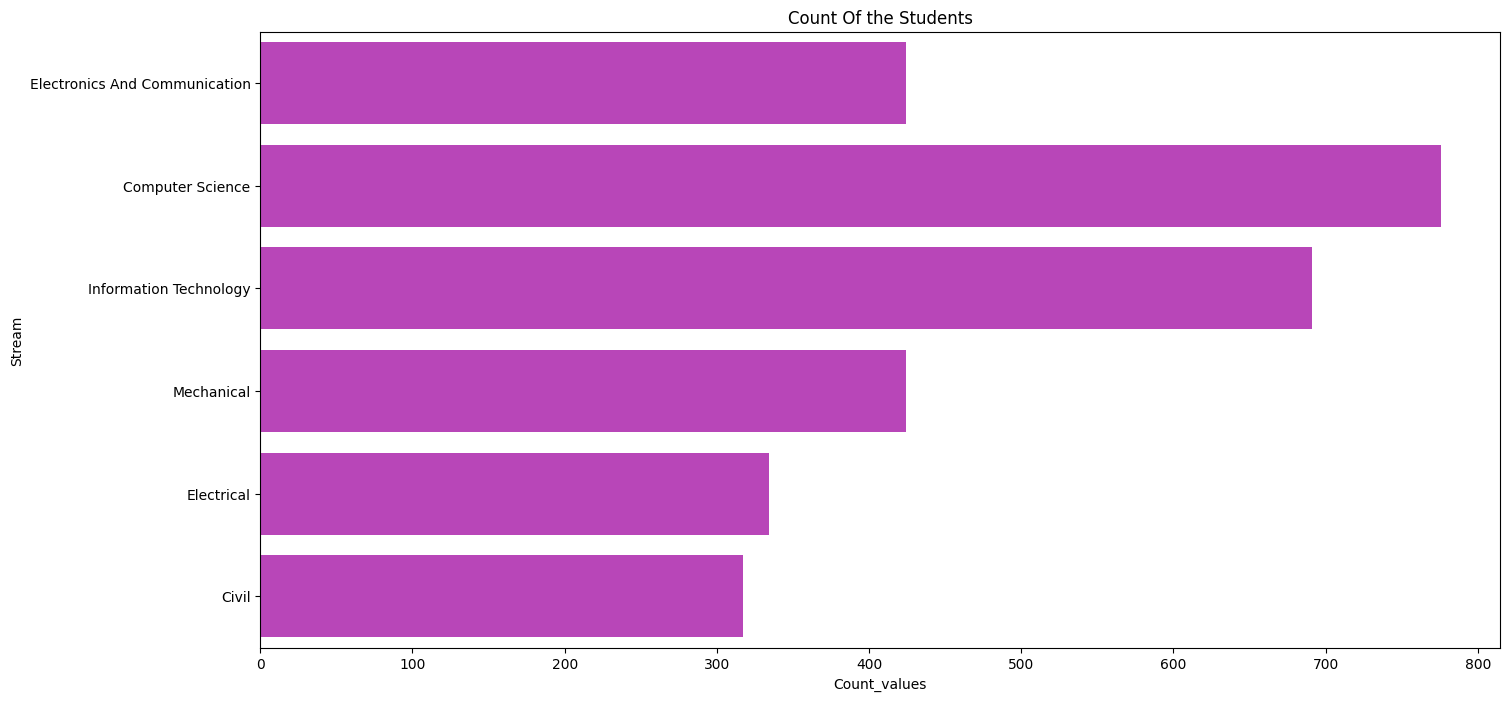

In [31]:
plt.figure(figsize=(16,8))
plt.title("Count Of the Students")
plt.xlabel("Count_values")
plt.ylabel("Stream")
sns.countplot( df.Stream ,color="m",linestyle="--",alpha=0.8)
plt.show()

<Axes: xlabel='CGPA', ylabel='Frequency'>

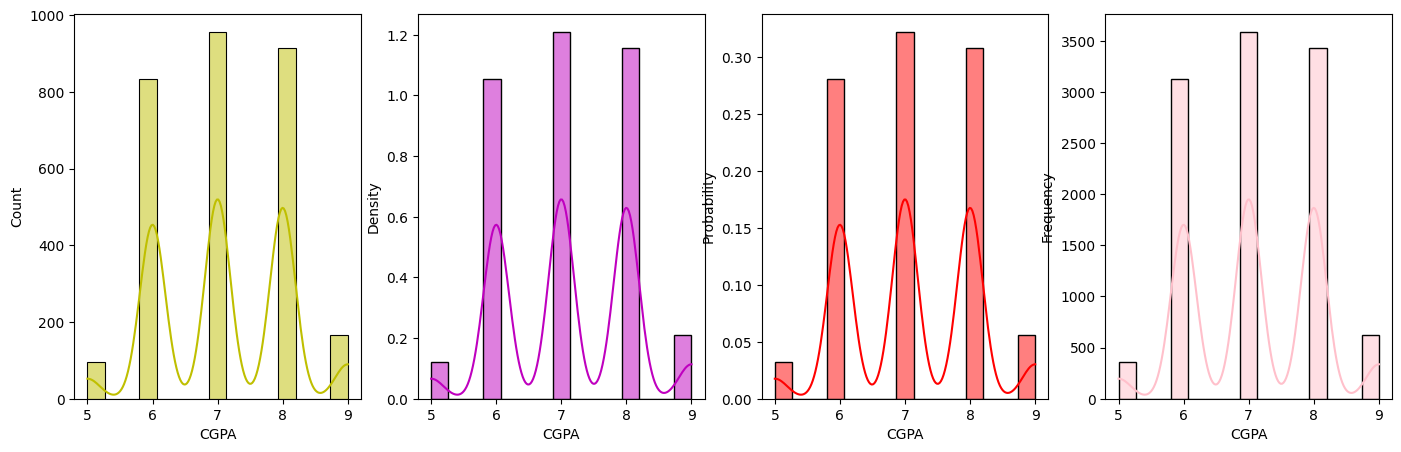

In [32]:

fig,axs=plt.subplots(nrows=1 , ncols=4 ,figsize=(17,5))

sns.histplot(df.CGPA,color="y",linewidth=0.8,kde=True,stat='count',ax=axs[0])
sns.histplot(df.CGPA,color="m",kde=True,stat='density',ax=axs[1])
sns.histplot(df.CGPA,color="r",kde=True,stat='probability',ax=axs[2])
sns.histplot(df.CGPA,color="pink",kde=True,stat='frequency',ax=axs[3])

In [33]:
df_count = df.Age.value_counts()
df_gcount = df.Gender.value_counts()

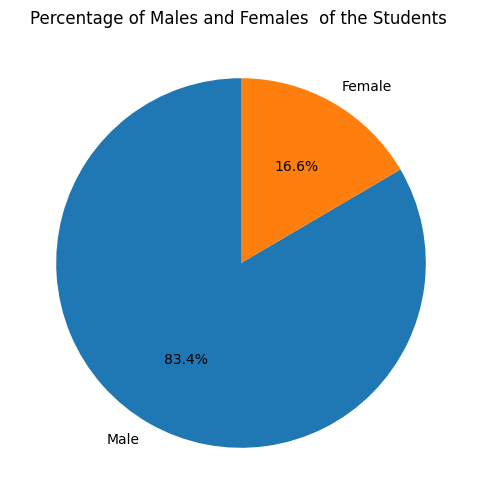

In [34]:
plt.figure(figsize=(16,6))
plt.pie( df_gcount,labels=df_gcount.index,autopct="%1.1f%%",startangle=90)
plt.title("Percentage of Males and Females  of the Students ")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10892\2580410124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PlacedOrNot', y='CGPA', data=df, palette='Set2')


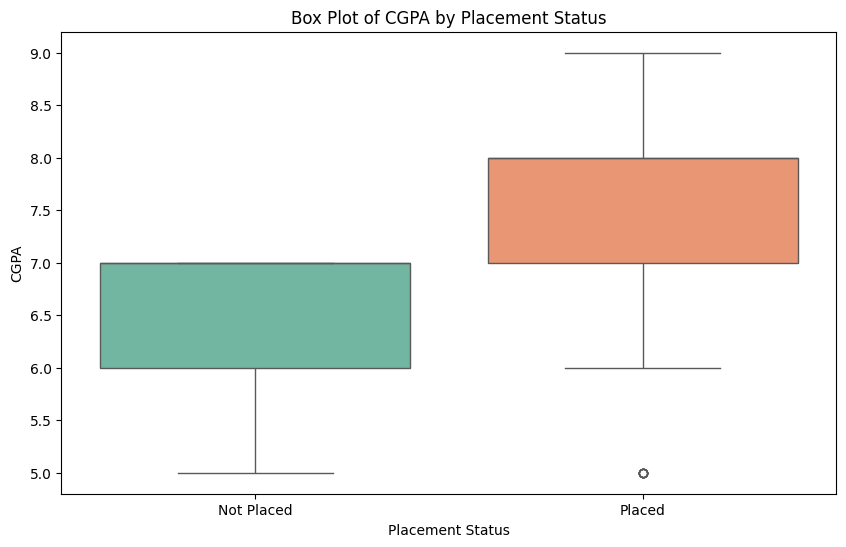

In [35]:

plt.figure(figsize=(10, 6)) 
sns.boxplot(x='PlacedOrNot', y='CGPA', data=df, palette='Set2')
plt.title('Box Plot of CGPA by Placement Status')
plt.xlabel('Placement Status')
plt.ylabel('CGPA')
plt.xticks([0, 1], ['Not Placed', 'Placed'])
plt.show()


Which stream has the highest average CGPA?
Is there any correlation between the number of internships and CGPA?
Do students with a history of backlogs tend to have lower CGPA?
Is there any difference in CGPA distribution between male and female students?
Can we identify any patterns in the data that indicate whether a student will be placed or not?

<Axes: xlabel='Stream', ylabel='CGPA'>

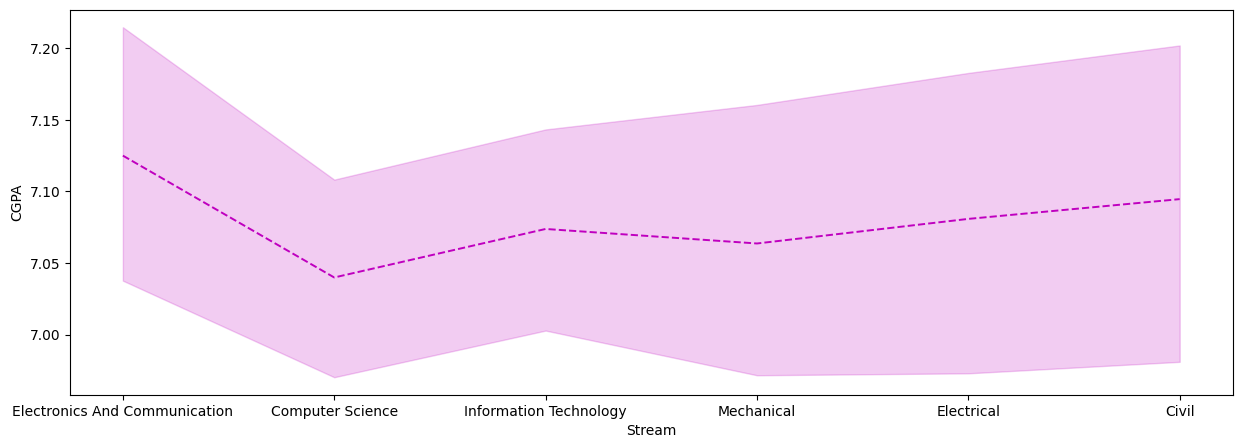

In [36]:
plt.figure(figsize=(15,5))

sns.lineplot(x = df.Stream , y =df.CGPA,linewidth=1.4,linestyle="--",color="m")

In [37]:
df_numeric = df.select_dtypes(include=["float","int"])

In [38]:
df_numeric.corr()

,Age,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs
Age,1.000000,0.006552,-0.119787,0.003042,0.046943,NaN
Internships,0.006552,1.000000,0.023496,0.004617,0.179334,NaN
CGPA,-0.119787,0.023496,1.000000,0.014991,0.588648,NaN
Hostel,0.003042,0.004617,0.014991,1.000000,-0.038182,NaN
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,1.000000,NaN
Total_Backlogs,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             2966 non-null   int64 
 1   Gender          2966 non-null   int32 
 2   Stream          2966 non-null   object
 3   Internships     2966 non-null   int64 
 4   CGPA            2966 non-null   int64 
 5   Hostel          2966 non-null   int64 
 6   PlacedOrNot     2966 non-null   int64 
 7   Total_Backlogs  2966 non-null   int64 
 8   stream          2966 non-null   int32 
dtypes: int32(2), int64(6), object(1)
memory usage: 185.5+ KB


<Axes: >

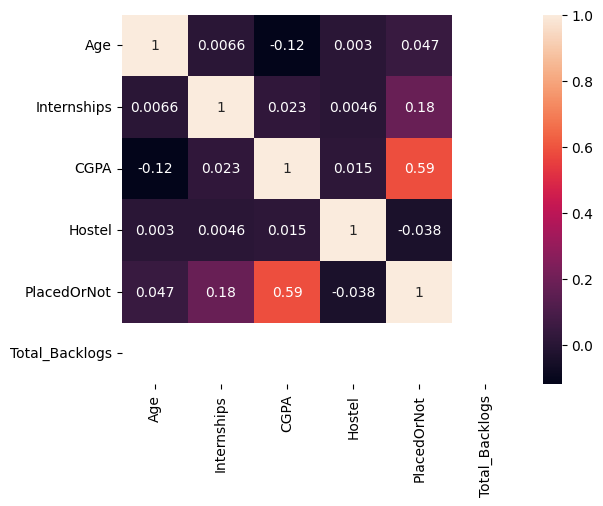

In [59]:
sns.heatmap(df_numeric.corr(),annot=True)

In [60]:
correlation = df['Internships'].corr(df['CGPA'])

print("Correlation coefficient between Internships and CGPA:", correlation)


Correlation coefficient between Internships and CGPA: 0.023495693727057447


<Axes: xlabel='Gender', ylabel='Count'>

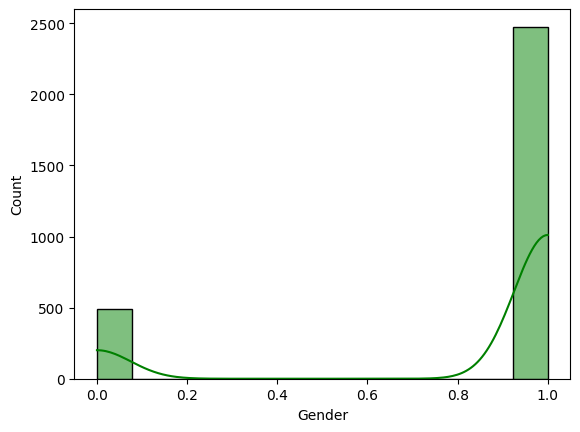

In [61]:
sns.histplot(df.Gender,color ='green',kde=True,stat='count')

<Axes: ylabel='PlacedOrNot'>

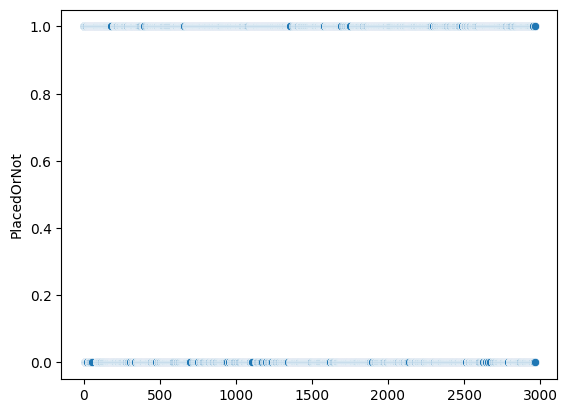

In [62]:
sns.scatterplot(df.PlacedOrNot,)

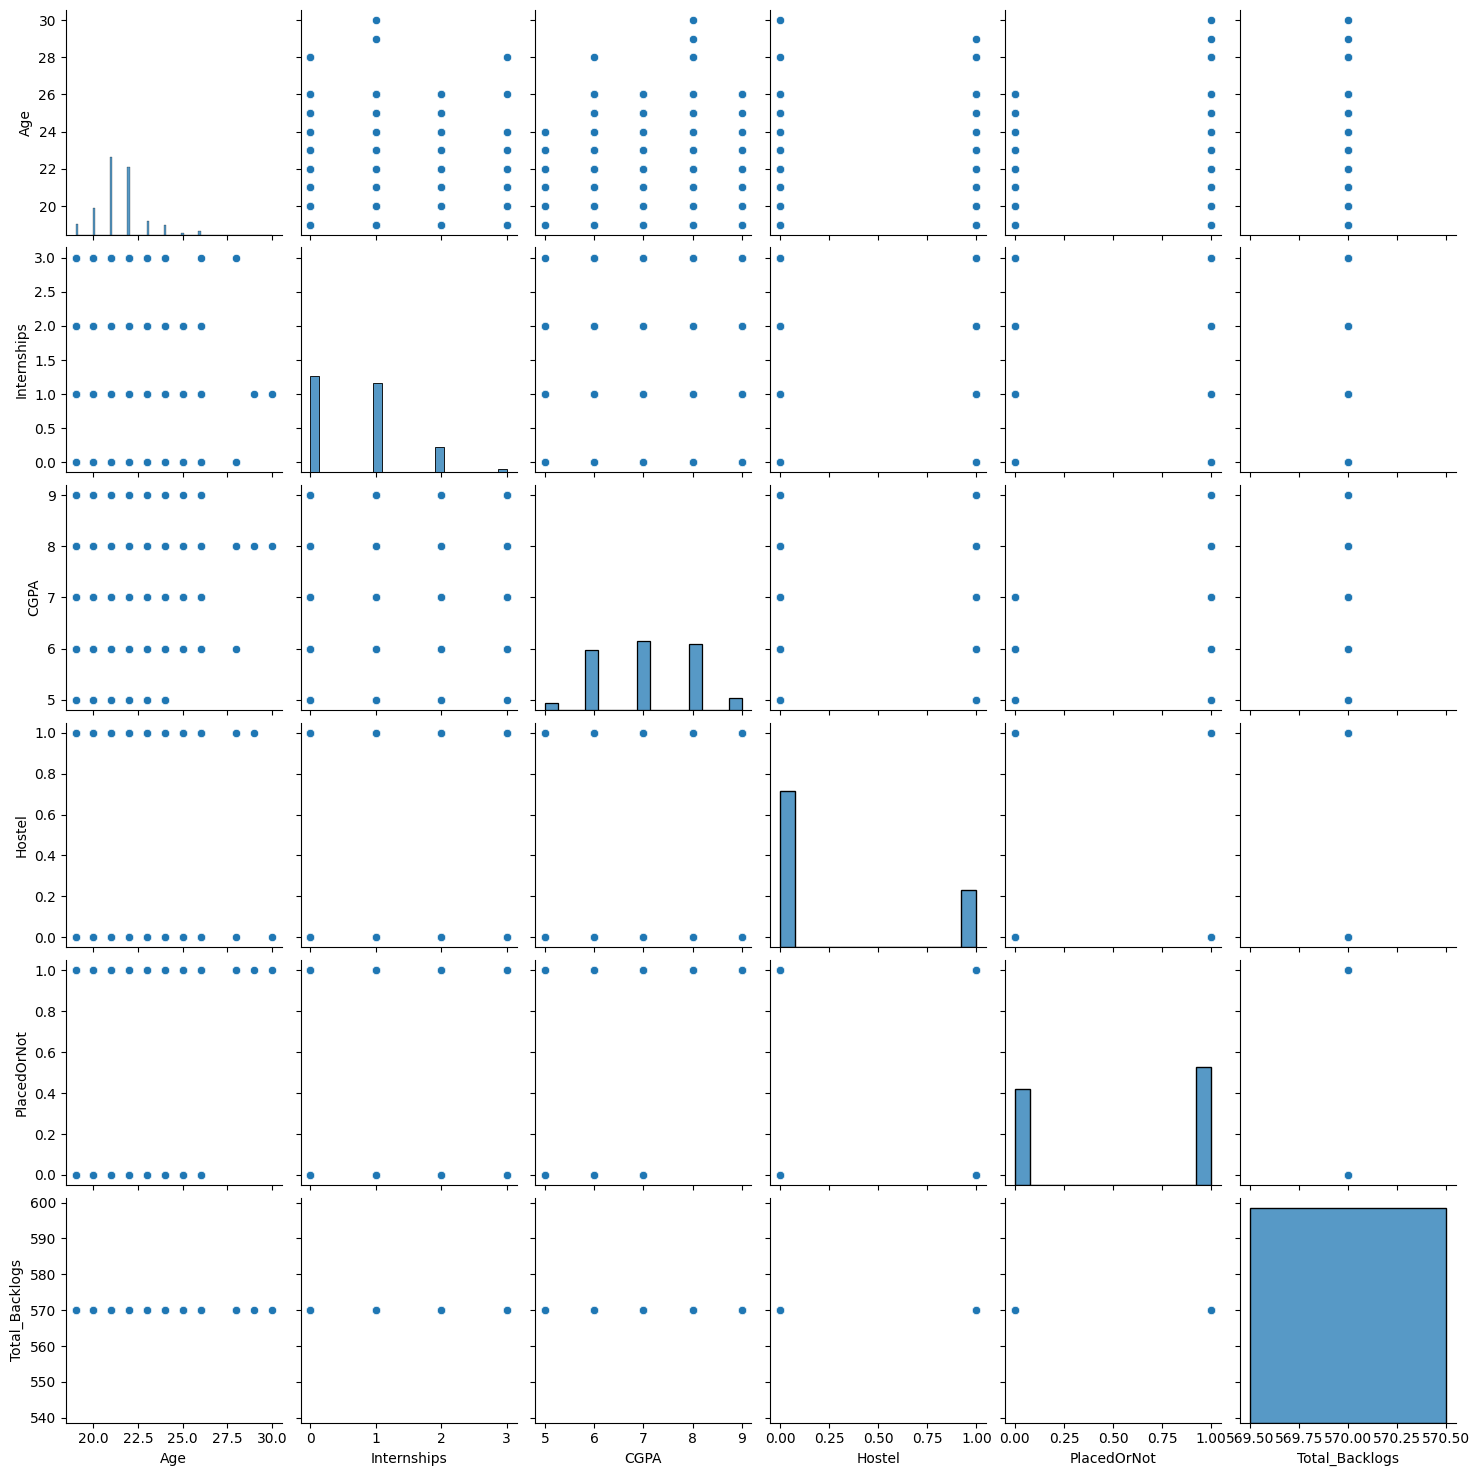

In [63]:
sns.pairplot(df_numeric)

<Axes: xlabel='Age', ylabel='PlacedOrNot'>

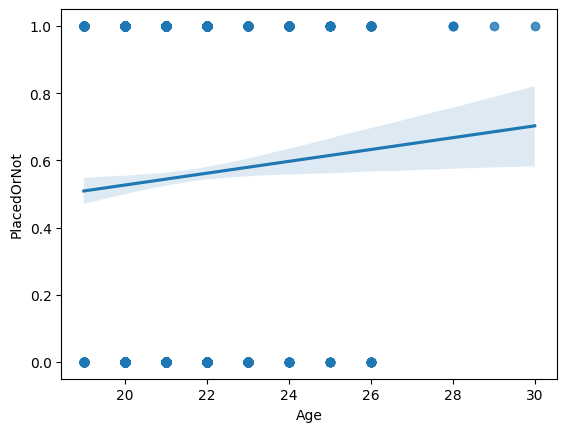

In [64]:
sns.regplot(x= df.Age, y =df.PlacedOrNot)

In [65]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs,stream
0,22,1,Electronics And Communication,1,8,1,1,570,3
1,21,0,Computer Science,0,7,1,1,570,1
2,22,0,Information Technology,1,6,0,1,570,4
3,21,1,Information Technology,0,8,0,1,570,4
4,22,1,Mechanical,0,8,1,1,570,5


In [66]:
df.Stream.nunique()

6

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
lb  = LabelEncoder()

In [81]:
df["stream"] = lb.fit_transform(df.Stream)

In [82]:
df.drop('Stream',axis=1)

,Age,Gender,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs,stream
0,22,1,1,8,1,1,570,3
1,21,0,0,7,1,1,570,1
2,22,0,1,6,0,1,570,4
3,21,1,0,8,0,1,570,4
4,22,1,0,8,1,1,570,5
...,...,...,...,...,...,...,...,...
2961,23,1,0,7,0,0,570,4
2962,23,1,1,7,1,0,570,5
2963,22,1,1,7,0,0,570,4
2964,22,1,1,7,0,0,570,1


In [71]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs,stream
0,22,1,Electronics And Communication,1,8,1,1,570,3
1,21,0,Computer Science,0,7,1,1,570,1
2,22,0,Information Technology,1,6,0,1,570,4
3,21,1,Information Technology,0,8,0,1,570,4
4,22,1,Mechanical,0,8,1,1,570,5
...,...,...,...,...,...,...,...,...,...
2961,23,1,Information Technology,0,7,0,0,570,4
2962,23,1,Mechanical,1,7,1,0,570,5
2963,22,1,Information Technology,1,7,0,0,570,4
2964,22,1,Computer Science,1,7,0,0,570,1


In [72]:
df['Gender'] = lb.fit_transform(df.Gender)

In [73]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs,stream
0,22,1,Electronics And Communication,1,8,1,1,570,3
1,21,0,Computer Science,0,7,1,1,570,1
2,22,0,Information Technology,1,6,0,1,570,4
3,21,1,Information Technology,0,8,0,1,570,4
4,22,1,Mechanical,0,8,1,1,570,5
...,...,...,...,...,...,...,...,...,...
2961,23,1,Information Technology,0,7,0,0,570,4
2962,23,1,Mechanical,1,7,1,0,570,5
2963,22,1,Information Technology,1,7,0,0,570,4
2964,22,1,Computer Science,1,7,0,0,570,1


In [86]:
df

,Age,Gender,Stream,Internships,CGPA,Hostel,PlacedOrNot,Total_Backlogs,stream
0,22,1,Electronics And Communication,1,8,1,1,570,3
1,21,0,Computer Science,0,7,1,1,570,1
2,22,0,Information Technology,1,6,0,1,570,4
3,21,1,Information Technology,0,8,0,1,570,4
4,22,1,Mechanical,0,8,1,1,570,5
...,...,...,...,...,...,...,...,...,...
2961,23,1,Information Technology,0,7,0,0,570,4
2962,23,1,Mechanical,1,7,1,0,570,5
2963,22,1,Information Technology,1,7,0,0,570,4
2964,22,1,Computer Science,1,7,0,0,570,1


In [88]:
x = df.drop(['Stream','Total_Backlogs','PlacedOrNot'],axis=1)

In [89]:
x

,Age,Gender,Internships,CGPA,Hostel,stream
0,22,1,1,8,1,3
1,21,0,0,7,1,1
2,22,0,1,6,0,4
3,21,1,0,8,0,4
4,22,1,0,8,1,5
...,...,...,...,...,...,...
2961,23,1,0,7,0,4
2962,23,1,1,7,1,5
2963,22,1,1,7,0,4
2964,22,1,1,7,0,1


In [90]:
y =df["PlacedOrNot"]

In [91]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.5,random_state=5)

In [94]:
from sklearn.linear_model import LogisticRegression 

In [95]:
LR = LogisticRegression()

In [96]:
LR.fit(x_train,y_train)

LogisticRegression()

In [97]:
x_Prediction = LR.predict(x_test)

In [98]:
x_Prediction

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [99]:
df_predition = pd.DataFrame({"Actual":y_test,"prdiction":x_Prediction}).reset_index()

In [100]:
df_predition.drop('index',axis=1,inplace=True)

In [106]:
df_predition

,Actual,prdiction
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1478,0,0
1479,1,1
1480,0,0
1481,0,0


In [109]:
from sklearn.metrics import accuracy_score  ,classification_report


In [119]:
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_binary and y_multiclass are your binary and multi-class target variables
# And y_pred_binary and y_pred_multiclass are your predicted values for binary and multi-class targets

# Evaluate binary targets
accuracy_binary = accuracy_score(y_test, x_Prediction)
report_binary = classification_report(y_test, x_Prediction)

# Evaluate multi-class targets
accuracy_multiclass = accuracy_score(y_test, x_Prediction)
report_multiclass = classification_report(y_test, x_Prediction)

print("Binary Accuracy:", accuracy_binary)
print("Binary Classification Report:\n", report_binary)

print("Multi-class Accuracy:", accuracy_multiclass)
print("Multi-class Classification Report:\n", report_multiclass)


Binary Accuracy: 0.7741065407956844
Binary Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       657
           1       0.81      0.78      0.79       826

    accuracy                           0.77      1483
   macro avg       0.77      0.77      0.77      1483
weighted avg       0.78      0.77      0.77      1483

Multi-class Accuracy: 0.7741065407956844
Multi-class Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       657
           1       0.81      0.78      0.79       826

    accuracy                           0.77      1483
   macro avg       0.77      0.77      0.77      1483
weighted avg       0.78      0.77      0.77      1483



In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
KN = KNeighborsClassifier()

In [125]:
KN.fit(x_train,y_train)

KNeighborsClassifier()

In [159]:
ky_Prediction = pd.DataFrame({"a":y_test,"b":ky})

,a,b
824,0,0
2636,1,1
281,1,1
378,0,0
1214,1,1
...,...,...
1661,0,0
2604,1,1
1819,0,1
2131,0,0


In [210]:
ky_acc =balanced_accuracy_score(y_test,ky)

In [211]:
ky_acc

0.8490266859781603

In [160]:
ky.ndim

1

In [161]:
y_test.ndim

1

In [171]:
from sklearn.svm import SVC

In [173]:
SVM =SVC()

In [174]:
SVM.fit(x_train,y_train)

SVC()

In [176]:
s_prediction = SVM.predict(x_test)

In [177]:
svm_prediction = pd.DataFrame({"a":y_test,"P":s_prediction})

In [207]:
SVC_acc = balanced_accuracy_score(y_test,s_prediction)

In [209]:
SVC_acc

0.7694487747889187

In [178]:
from sklearn.tree import DecisionTreeClassifier

In [179]:
DTC = DecisionTreeClassifier()

In [180]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [182]:
dy_prid = DTC.predict(x_test)

In [184]:
DTC_Prediction = pd.DataFrame({"A":y_test,"P":dy_prid})

In [185]:
DTC_Prediction

,A,P
824,0,1
2636,1,1
281,1,1
378,0,0
1214,1,1
...,...,...
1661,0,0
2604,1,1
1819,0,0
2131,0,0


In [205]:
DTC_acc = balanced_accuracy_score(y_test,dy_prid)

In [206]:
DTC_acc

0.8573630597661246

In [186]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
RF = RandomForestClassifier()

In [190]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [191]:
r_prdic = RF.predict(x_test)

In [194]:
r_prdic

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [196]:
RF_Prediction = pd.DataFrame({"A":y_test,"P":r_prdic})

In [198]:
RF_Prediction

,A,P
824,0,1
2636,1,1
281,1,1
378,0,0
1214,1,1
...,...,...
1661,0,0
2604,1,1
1819,0,1
2131,0,0


In [199]:
from sklearn.metrics import balanced_accuracy_score

In [202]:
RF_acc =balanced_accuracy_score(y_test,r_prdic)

In [204]:
RF_acc

0.8575012622493468

In [217]:
RF_Prediction = pd.DataFrame({"A":y_test,"P":r_prdic})

In [218]:
RF_Prediction

,A,P
824,0,1
2636,1,1
281,1,1
378,0,0
1214,1,1
...,...,...
1661,0,0
2604,1,1
1819,0,1
2131,0,0


In [212]:
from sklearn.naive_bayes import GaussianNB

In [213]:
G = GaussianNB()

In [214]:
G.fit(x_train,y_train)

GaussianNB()

In [215]:
G_pred = G.predict(x_test)

In [220]:
G_acc =balanced_accuracy_score(y_test,G_pred)

In [221]:
G_acc

0.8195213771601049

In [222]:
G_Prediction = pd.DataFrame({"A":y_test,"P":G_pred})

In [223]:
G_Prediction

,A,P
824,0,0
2636,1,1
281,1,1
378,0,0
1214,1,1
...,...,...
1661,0,0
2604,1,1
1819,0,1
2131,0,0
